In [71]:
!pip install prophet

In [72]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, f1_score

In [73]:
df = pd.read_excel('https://github.com/sauloajs/tech-challenge-02/raw/main/base_unificada.xlsx')
df.head()

,data,ultimo_valor,valor_abertura,valor_maximo,valor_minimo,volume,variacao,bmp_inv_carteira,bmp_inv_direto,cpi_aucsl,...,ipca_12_meses,ke,ke_rf_10_y,ke_cpi,ke_ipca,ke_premio_risco,ke_risco_pais,ke_selic_dia,indice_pib,crescimento_pib
0,2005-01-03,25.722,26.193,26.492,25.671,115.64,-1.81,-419.62648,1201.56436,191.6,...,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.71,0.123492
1,2005-01-04,24.848,25.722,25.873,24.791,146.14,-3.40,-419.62648,1201.56436,191.6,...,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.71,0.123492
2,2005-01-05,24.692,24.859,25.001,24.523,127.42,-0.63,-419.62648,1201.56436,191.6,...,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.71,0.123492
3,2005-01-06,24.367,24.695,24.808,24.250,151.17,-1.32,-419.62648,1201.56436,191.6,...,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.71,0.123492
4,2005-01-07,24.747,24.376,24.874,24.376,104.96,1.56,-419.62648,1201.56436,191.6,...,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.71,0.123492


In [74]:
df = df[['data', 'ultimo_valor']]

In [75]:
df.columns = ['ds', 'y']
df.tail()

,ds,y
4677,2023-07-18,117.841
4678,2023-07-19,117.552
4679,2023-07-20,118.083
4680,2023-07-21,120.217
4681,2023-07-24,121.506


In [76]:
df.set_index('ds', inplace=True)

In [77]:
train = df['2015-01-01':'2022-07-24']
test = df['2022-07-25':'2023-07-21']

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4682 entries, 2005-01-03 to 2023-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       4594 non-null   float64
dtypes: float64(1)
memory usage: 202.2 KB


In [79]:
train.reset_index(inplace=True)

In [80]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y8igp_k/qvah0a8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y8igp_k/wp9zzvzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30957', 'data', 'file=/tmp/tmp9y8igp_k/qvah0a8p.json', 'init=/tmp/tmp9y8igp_k/wp9zzvzw.json', 'output', 'file=/tmp/tmp9y8igp_k/prophet_modeluw1ovxn_/prophet_model-20230809121824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08
...,...
2308,2023-07-18
2309,2023-07-19
2310,2023-07-20
2311,2023-07-21


In [82]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2308,2023-07-18,98.814785,77.826277,119.620464
2309,2023-07-19,98.957470,78.467694,119.510332
2310,2023-07-20,99.086283,79.029359,119.956726
2311,2023-07-21,99.203236,78.976486,119.562862
2312,2023-07-22,97.046472,75.633838,117.448111


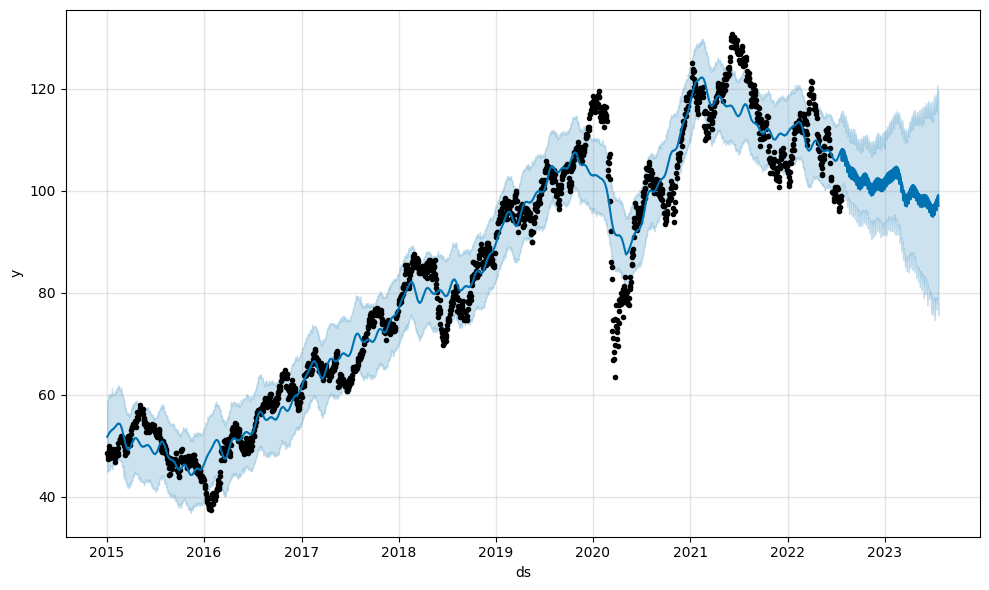

In [83]:
fig1 = m.plot(forecast)

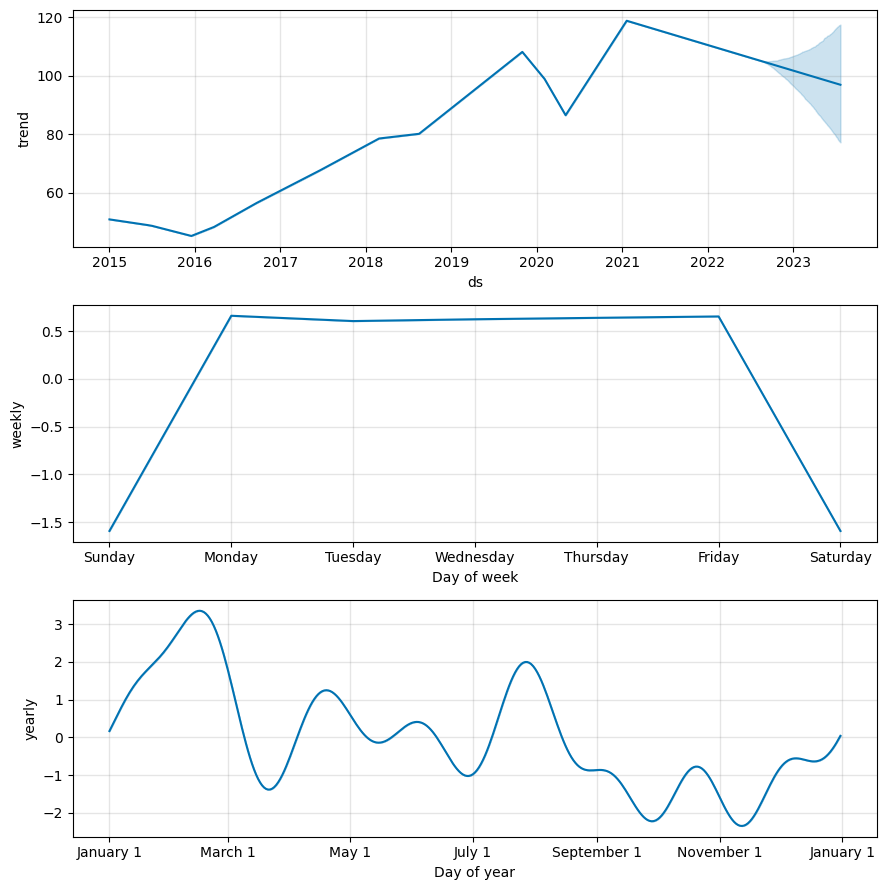

In [84]:
fig2 = m.plot_components(forecast)

In [85]:
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

In [86]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y8igp_k/qzibrs0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9y8igp_k/c976snrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91090', 'data', 'file=/tmp/tmp9y8igp_k/qzibrs0m.json', 'init=/tmp/tmp9y8igp_k/c976snrk.json', 'output', 'file=/tmp/tmp9y8igp_k/prophet_modeljjkx0h36/prophet_model-20230809122309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


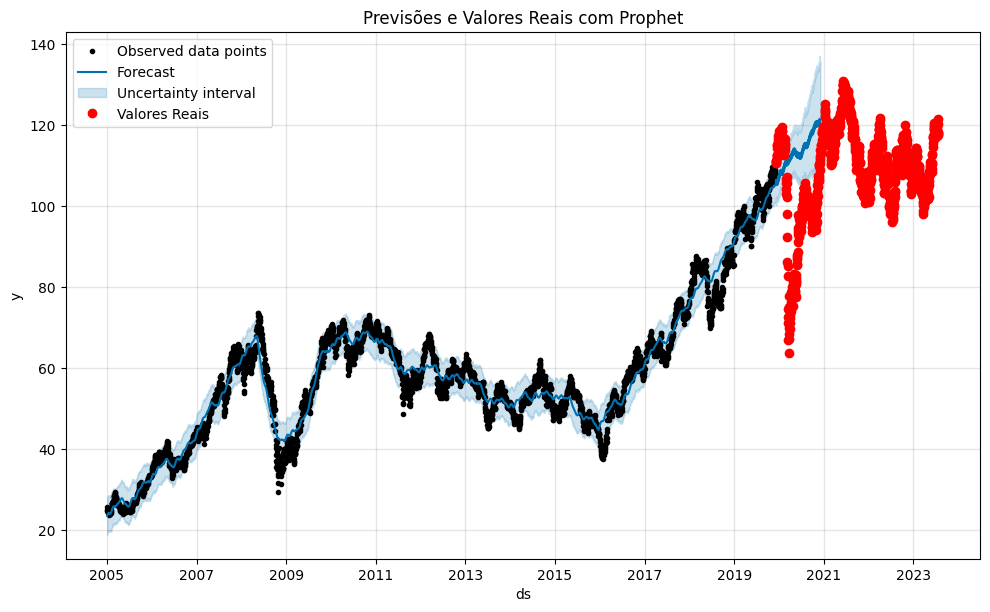

In [93]:
# Inicializando e ajustando o modelo Prophet com o conjunto de treinamento
model = Prophet()
model.fit(train_df)

# Criando um dataframe com datas futuras para fazer previsões
future = model.make_future_dataframe(periods=365, freq='D')

# Fazendo as previsões no conjunto de teste
forecast = model.predict(future)

# Plotando as previsões e os valores reais do conjunto de teste
fig = model.plot(forecast)
plt.plot(test_df['ds'], test_df['y'], 'ro', label='Valores Reais')
plt.title('Previsões e Valores Reais com Prophet')
plt.legend()
plt.show()